In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\dell\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(df.columns[0],inplace=True,axis=1)

In [4]:
df=df.iloc[:,0:-1]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

#### LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

#### EDA

<AxesSubplot:>

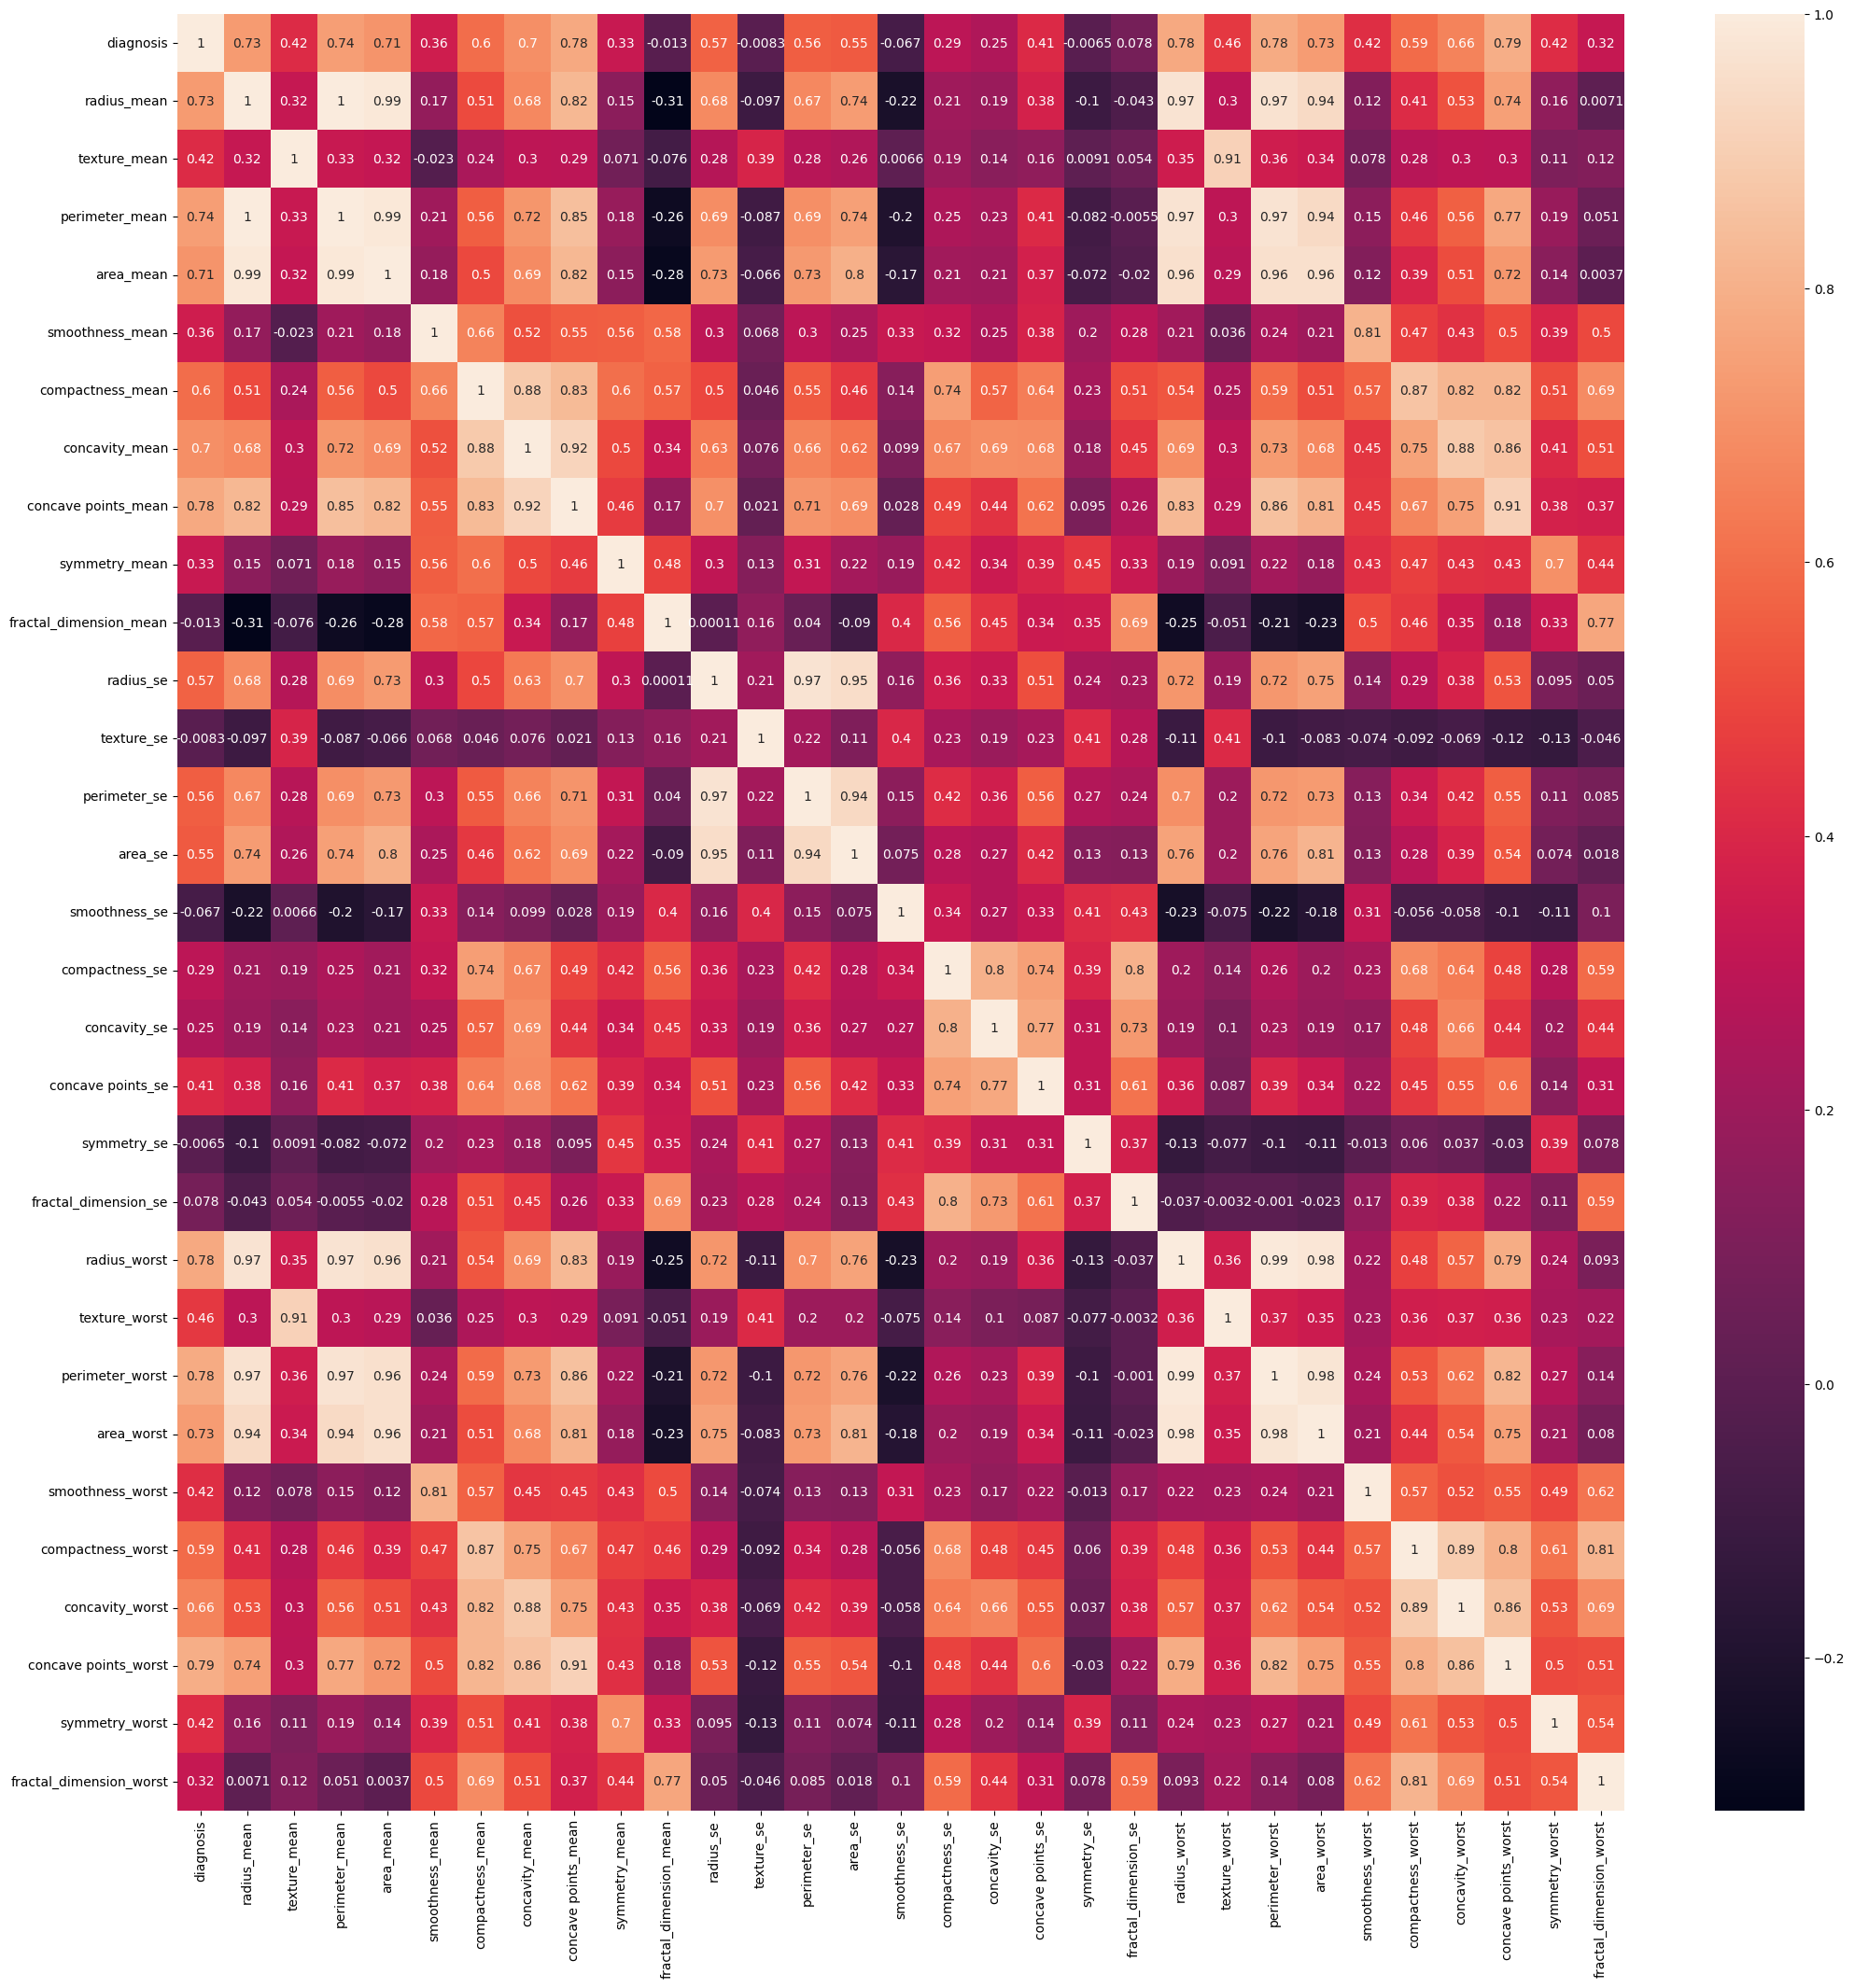

In [7]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

Another instance of multicollinearity is observed between the "mean" columns and the "worst" column. For example, the area_mean column displays a correlation of 0.96 with the area_worst column. Remarkably, each of the 10 key attributes shows very high correlations between its "mean" and "worst" columns because the "worst" columns essentially just a subset of the "mean" columns, are the "mean" of certain values. In this case, the "worst" columns are discarded from the analysis, and focus is solely placed on the "mean" columns. All the "worst" columns are dropped from the dataset and the radius of a cell is selected as the attribute defining cell size, as it is the fundamental building block of cell dimensions.

In [8]:
# Drop all "worst" columns
# Drop all columns related to the "perimeter" and "area" features
# Drop all columns related to the "concavity" and "concave points" features 
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst',
        'perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se',
        'concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se',
        'fractal_dimension_se']
df = df.drop(cols, axis=1)

# verify remaining columns
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se'],
      dtype='object')

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756


#### Splitting the Dataset

In [10]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:]
y = df['diagnosis']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

####  Feature Scaling

Feature Scaling, which is a step of Data Preprocessing applied to independent variables or features of data, is crucial for normalizing the data within a particular range. Standardization is employed using the StandardScaler from the scikit-learn library. This process involved fitting the scaler to the training data (X_train) to compute the mean and standard deviation for each feature. Subsequently, the training set is transformed using these computed statistics. Similarly, the test set (X_test) is transformed using the same scaler to ensure consistency in scaling between the training and test data. Standardization helps in centering and scaling the features, making them suitable for algorithms that are sensitive to feature scaling, such as support vector machines and k-nearest neighbors

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


X_train_standard = sc.fit_transform(X_train)
X_test_standard = sc.transform(X_test)

Machine learning models are selected according to the problem's nature. Given labeled data (Malignant/Benign), a supervised learning approach is chosen for this study. Since the objective is to categorize tumors as malignant or benign, a classification problem is addressed. KNN, Logistic Regression, and SVM models will be tested using Scikit-learn to determine tumor malignancy based on cell features. This section focuses on employing classification algorithms to tackle the problem.


### Model Training, Evaluation & Selection

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [58]:
from sklearn.model_selection import GridSearchCV
models_name = {
    'LR':LogisticRegression(),
    'RFC':RandomForestClassifier(),
    'DTC':DecisionTreeClassifier(),
    'BC': BaggingClassifier(),
    'SVC': SVC(),
    'KNN':KNeighborsClassifier()
}


params_dict = {
    'LR':{'fit_intercept':[True,False],
         'solver':['lbfgs']},
    'RFC':{'n_estimators':[10,20,30,50,80],
          'criterion':['gini'],'max_depth':[2,5,6,8],'min_samples_split':[2,5,6,8],
          'min_samples_leaf':[2,5,6,8],'bootstrap':[True,False]},
    'DTC':{
          'splitter':['best','random'],
          'max_depth':[2,5,6,8],
          'min_samples_split':[2,5,6,8],
          'min_samples_leaf':[2,5,6,8],
          'max_features':[2,5,6],
          'max_leaf_nodes':[2,5,6,8]},
    'BC':{'n_estimators':[10,20,30,50,80],
          'max_samples':[2,5,6,8],'max_features':[2,5,6,8],
          'bootstrap':[True,False]},
    'SVC':{'C':[1,2,3,4,5],
          'kernel':['linear'],'degree':[1,2,3]},
    'KNN':{'n_neighbors':[1,2,3,4,5],
          'weights':['uniform','distance']}
    
}



In [77]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score

Model_List = []
Accuracy_Score = []
Accuracy = [] 
Best_Parameters = []
Precision = []
Recall = []
for key,value in models_name.items():
    Model_Parameters = params_dict[key]
    grid = RandomizedSearchCV(value , param_distributions=Model_Parameters, cv=5, return_train_score=False,error_score='raise',n_jobs=-1)
    
    grid.fit(X_train_standard,y_train)
    
    Model_List.append(key)
    Accuracy_Score.append(grid.best_score_)
    Best_Parameters.append(grid.best_params_)
    Precision.append(precision_score(y_test,grid.predict(X_test_standard)))
    Recall.append(recall_score(y_test,grid.predict(X_test_standard)))
    Accuracy.append(accuracy_score(y_test,grid.predict(X_test_standard)))
    print(key, 'model has been completed!')


#Main_list = [Model_List,Accuracy_Score,Best_Parameters]
    Result_df = pd.DataFrame({'Model Name':Model_List,'Accuracy_Scores':Accuracy_Score,
                          'Best Parameters':Best_Parameters,'Precision':Precision,'Recall':Recall,
                             'Accuracy':Accuracy})
    Result_df.to_csv('RandomizedSeachCV.csv')
print('Done')

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


LR model has been completed!
RFC model has been completed!
DTC model has been completed!
BC model has been completed!
SVC model has been completed!
KNN model has been completed!
Done


In [78]:
Result_df

,Model Name,Accuracy_Scores,Best Parameters,Precision,Recall,Accuracy
0,LR,0.936264,"{'solver': 'lbfgs', 'fit_intercept': True}",0.916667,0.916667,0.929825
1,RFC,0.931868,"{'n_estimators': 10, 'min_samples_split': 6, '...",0.956522,0.916667,0.947368
2,DTC,0.898901,"{'splitter': 'best', 'min_samples_split': 8, '...",0.897959,0.916667,0.921053
3,BC,0.890110,"{'n_estimators': 80, 'max_samples': 8, 'max_fe...",0.939394,0.645833,0.833333
4,SVC,0.942857,"{'kernel': 'linear', 'degree': 3, 'C': 2}",0.914894,0.895833,0.921053
5,KNN,0.923077,"{'weights': 'distance', 'n_neighbors': 4}",0.933333,0.875000,0.921053


The results obtained from this comparison reflect the performance of different machine learning models. By comparing three different models, the analysis measures the classification performance of each.

The RFC model demonstrates the highest accuracy score of 0.956522, with precision score 0.95 indicating its superior performance in classifying the dataset with minimal errors.

The Logistic Regression model is the second position with an accuracy score of 0.936264. This signifies a strong performance, albeit slightly lower than that of the SVM model.

The K-Nearest Neighbors (KNN) model ranks third with an accuracy score of 0.923077	, showcasing relatively lower predictive accuracy compared to the other models.

In conclusion, this analysis highlights that the SVM model outperforms others in accurately classifying the dataset